In [72]:
import pandas as pd
import numpy as np
import requests
import json
import spotipy
import matplotlib.pyplot as plt


In [92]:
# Import our data into pandas from CSV
csvfilepath = 'Trackfile.csv'
track_df = pd.read_csv(csvfilepath)

track_df

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.5400,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.3760,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.4030,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.1790,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.6070,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Future Blues,7cAXWkbpR8Szb06AFXhAmJ,2013-08-27,180773,15,0.461,0.3080,8.0,-15.467,1.0,0.0515,0.9950,0.808000,0.1180,0.672,201.370
9710,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Match Box Blues,4dBUAjMjmAednMqt8PU4AI,1992-01-01,187400,14,0.558,0.0496,2.0,-20.291,1.0,0.0590,0.9960,0.639000,0.1180,0.372,134.337
9711,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Rabbit Foot Blues,69xrgBndFd3zs6kqVZ8LDO,1991,179095,13,0.556,0.1660,8.0,-17.650,1.0,0.0542,0.9430,0.000038,0.5630,0.539,123.042
9712,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,That Black Snake Moan,0I4nvtM87RCvywkmeinsqI,1992-01-01,178640,12,0.529,0.0183,6.0,-21.036,1.0,0.0581,0.9820,0.031600,0.1330,0.554,142.349


In [105]:
track_df["Release Year"] = track_df["Release Date"].str.slice(0, 4)
track_df["Release Year"] = track_df["Release Year"].astype(int)

In [106]:
bins = [0, 20, 40, 60, 80, 100]
# Create the names for the five bins
group_names = ["0-20", "20-40", "40-60", "60-80", "80-100"]
track_df["Popularity Group"] = pd.cut(track_df["Popularity"], bins, labels=group_names)

In [113]:
bins = [1920,1930, 1940,1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# Create the names for the five bins
group_names = ["1920-30","1930-40","1940-50","1950-60", "1960-70", "1970-80", "1980-90", "1990-2000","2000-10", "2010-20"]
track_df["Release Year Decade"] = pd.cut(track_df["Release Year"], bins, labels=group_names)

In [122]:
filtered_tracks = track_df.loc[:, ['Track ID', 'Track Duration', 'Release Year','Popularity', 'Popularity Group', 'Release Year Decade']] 
filtered_tracks["Track Duration"]  = round(((filtered_tracks["Track Duration"]/1000)/60),0)
filtered_tracks = filtered_tracks.rename(columns={'Track Duration': 'Track Duration(In Mins)'})


In [123]:
lowerq = float(filtered_tracks["Track Duration(In Mins)"].quantile(0.25))
upperq = float(filtered_tracks["Track Duration(In Mins)"].quantile(0.75))
median = float(filtered_tracks["Track Duration(In Mins)"].quantile(0.5))
iqr = upperq-lowerq
lower_bound = lowerq - (3*iqr)
upper_bound = upperq + (3*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = filtered_tracks.loc[(filtered_tracks['Track Duration(In Mins)'] >= lower_bound) & (filtered_tracks['Track Duration(In Mins)'] <= upper_bound)]
outlier_occupancy.head()

Values below -3.0 could be outliers.
Values above 11.0 could be outliers.


,Track ID,Track Duration(In Mins),Release Year,Popularity,Popularity Group,Release Year Decade
0,6dGnYIeXmHdcikdzNNDMm2,3.0,1969,83,80-100,1960-70
1,2EqlS6tkEnglzr7tkKAAYD,4.0,1969,78,60-80,1960-70
2,7iN1s7xHE4ifF5povM6A48,4.0,1970,78,60-80,1960-70
3,3BQHpFgAp4l80e1XslIjNI,2.0,1965,77,60-80,1960-70
4,0aym2LBJBk9DAYuHHutrIl,7.0,2000,76,60-80,1990-2000


In [124]:
filtered_tracks_group = outlier_occupancy.groupby("Popularity Group")
print("Tracks with shorter duration are more popular")
filtered_tracks_group["Track Duration(In Mins)"].mean()


Tracks with shorter duration are more popular


Popularity Group
0-20      3.939302
20-40     4.080110
40-60     4.151346
60-80     4.128495
80-100    3.745455
Name: Track Duration(In Mins), dtype: float64

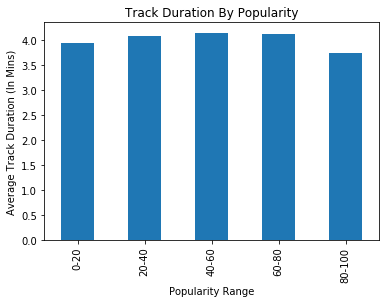

<Figure size 432x288 with 0 Axes>

In [125]:
Average_Track_Duration = filtered_tracks_group["Track Duration(In Mins)"].mean()
Track_chart = Average_Track_Duration.plot(kind="bar", title="Track Duration By Popularity")
Track_chart.set_xlabel("Popularity Range")
Track_chart.set_ylabel("Average Track Duration (In Mins)")

plt.show()
plt.tight_layout()

In [128]:
filtered_tracks_group = outlier_occupancy.groupby("Release Year Decade")
print("Are tracks getting shorter over decades? ")
filtered_tracks_group["Track Duration(In Mins)"].mean()


Are tracks getting shorter over decades? 


Release Year Decade
1920-30      3.875000
1930-40      2.843750
1940-50      3.062500
1950-60      3.700880
1960-70      3.617900
1970-80      4.196746
1980-90      4.342105
1990-2000    4.325401
2000-10      4.061249
2010-20      4.070603
Name: Track Duration(In Mins), dtype: float64

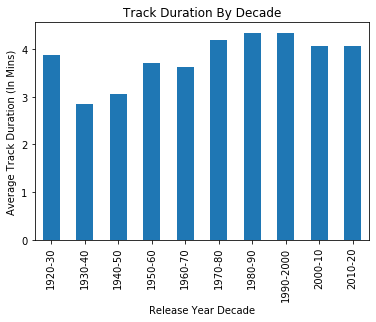

<Figure size 432x288 with 0 Axes>

In [129]:
Average_Track_Duration = filtered_tracks_group["Track Duration(In Mins)"].mean()
Track_chart = Average_Track_Duration.plot(kind="bar", title="Track Duration By Decade")
Track_chart.set_xlabel("Release Year Decade")
Track_chart.set_ylabel("Average Track Duration (In Mins)")

plt.show()
plt.tight_layout()

In [ ]:
#grouped_tracks = top10_tracks.groupby("Artist ID")
# Mean of dancebility vs energy 
# scatter chart 
# linear regression


In [ ]:
#grouped_tracks = top10_tracks.groupby("Artist ID")
# Mean of Valence vs energy 
# scatter chart 
# linear regression


In [ ]:
# how many artist have same genre
# artist with multiple genre are more followed or more popular or not

In [ ]:

# group by each genre and create bins of popularity 10-20 , 20-30, 30-40
# figure out the artist count for each genre and then put the artist into bins of popularity.
# Get the 2 popularity bins and plot for each genere

In [ ]:
# finding out a track with more dancebility is more popular

In [ ]:
# in what decade hat kind of songs were more popular. ( track with what features were more popular)

In [ ]:
# Per decade plot a graph for certain features of tracks to see which feature were more popular in cetrain decades

In [ ]:
# popularity of tracks vs track duration. Are tracks with shorter duration are more popular?
# average Track duration is getting shorter over time